In [1]:
import pandas as pd
import requests
import seaborn as sns
import json
from tqdm import tqdm

In [2]:
df = pd.read_csv('dialect_dataset.csv')
print(f"the dataframe shape: {df.shape}")

the dataframe shape: (458197, 2)


In [3]:
df

,id,dialect
0,1175358310087892992,IQ
1,1175416117793349632,IQ
2,1175450108898565888,IQ
3,1175471073770573824,IQ
4,1175496913145217024,IQ
...,...,...
458192,1019484980282580992,BH
458193,1021083283709407232,BH
458194,1017477537889431552,BH
458195,1022430374696239232,BH


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  int64 
 1   dialect  458197 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


In [5]:
df.isnull().sum()

id         0
dialect    0
dtype: int64

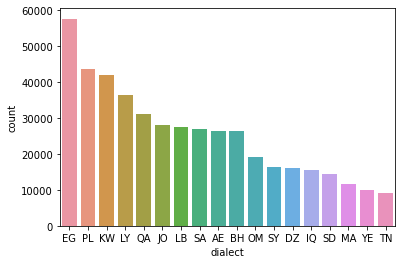

In [6]:
counts = df.dialect.value_counts()
counts_df = pd.DataFrame(counts.to_dict().items(), columns=["dialect", "count"])
sns.barplot(data = counts_df, x="dialect", y="count", order=counts_df['dialect']);

In [7]:
url = 'https://recruitment.aimtechnologies.co/ai-tasks'
df_text = pd.DataFrame(columns = ['id','text'])
max_size = 1000

for i in tqdm(range(round(df.shape[0]/max_size) + 1)):
    
    # transfer every value in int to str and then take 1000 elements to send data through POST request
    if i == round(df.shape[0]/max_size):
        # choose the remaining data to be sent to a POST request
        data = df['id'].agg(str).iloc[i*max_size:].to_list()
    else:
        data = df['id'].agg(str).iloc[i*max_size:(i+1)*max_size].to_list()
        
    # send POST request with 1000 elements
    response = requests.post(url, data=json.dumps(data))
    
    # override encoding with 'utf-8'
    response.encoding = 'utf-8'
    
    # transform string to dict
    x = json.loads(response.text)
    
    # concatenate the new response data with the "df_text"
    dict_ = {'id': list(x.keys()), 'text': list(x.values())}
    df_text = pd.concat([df_text, pd.DataFrame(dict_)], ignore_index=True)
    
df_text

100%|████████████████████████████████████████████████████████████████████████████████| 459/459 [21:21<00:00,  2.79s/it]


,id,text
0,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺
...,...,...
458192,1019484980282580992,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅
458193,1021083283709407232,@Zzainabali @P_ameerah والله ماينده ابش يختي
458194,1017477537889431552,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...
458195,1022430374696239232,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋


In [8]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      458197 non-null  object
 1   text    458197 non-null  object
dtypes: object(2)
memory usage: 7.0+ MB


In [12]:
df_text

,id,text
0,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺
...,...,...
458192,1019484980282580992,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅
458193,1021083283709407232,@Zzainabali @P_ameerah والله ماينده ابش يختي
458194,1017477537889431552,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...
458195,1022430374696239232,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋


In [14]:
# transform id object to int 
df_text['id'] = df_text['id'].agg(int)

# merge df_text with original dataframe
df_merge = df.merge(df_text, on='id')
df_merge

,id,dialect,text
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺
...,...,...,...
458192,1019484980282580992,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅
458193,1021083283709407232,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي
458194,1017477537889431552,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...
458195,1022430374696239232,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋


In [15]:
# save new dataframe to csv file
df_merge.to_csv("dialect_dataset_modified.csv", index=False)